##**Model 1: Efficient approach for multiple SELECT IF definitions**

In [17]:
# Python script for generating multiple similar SELECT IF definitions
conditions = [
    {'variable1': 'value1', 'variable2': 'value2'},
    {'variable3': 'value3', 'variable4': 'value4'},
]

select_if_statements = []

for condition in conditions:
    conditions_str = " AND ".join(f"({key} = '{value}')" for key, value in condition.items())
    print("SELETE IF", conditions_str)



SELETE IF (variable1 = 'value1') AND (variable2 = 'value2')
SELETE IF (variable3 = 'value3') AND (variable4 = 'value4')


#**Module 2: Prediction model building**

##Data preprocessing


1.   Dataset exploratory analysis
2.   Missing values Handling
1.   Data Standardization





In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [166]:
# Load the dataset
data = pd.read_csv("/content/sample_data/Module 2.csv")
data

,Respondent,Country,Awarenes,Funnel,Familiarity,PPurchase,OAR,Satisfied,Purchase_Likelihood,Recommendation,...,Dedicated farms,Grasscowsa,Variety,Cheesecraftmanship,Awardcheese,HQCHEESE,HQINGRIDIENTS,Dairyhealth,foodipurchase,WillingPayfor
0,5,USA,1,1,10.0,1.0,9,1.0,3,9.0,...,9,9,9,10,9,9,10,10,10,9
1,8,USA,1,1,10.0,1.0,9,1.0,1,11.0,...,9,10,9,7,9,9,9,8,9,8
2,9,USA,1,1,10.0,2.0,9,2.0,2,10.0,...,10,10,9,10,9,9,9,10,9,9
3,10,USA,1,1,11.0,1.0,8,1.0,1,11.0,...,10,9,10,9,8,10,8,10,10,8
4,11,USA,1,1,9.0,1.0,9,2.0,2,10.0,...,7,4,6,6,8,6,9,9,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,11926,Ireland,0,0,NaN,NaN,9,NaN,2,NaN,...,7,9,7,8,8,8,8,9,9,8
5912,11934,Ireland,0,0,NaN,NaN,8,NaN,3,NaN,...,10,10,8,9,8,7,10,8,8,8
5913,11950,Ireland,0,0,NaN,NaN,8,NaN,5,NaN,...,9,9,7,8,8,9,9,9,8,8
5914,12024,Ireland,0,0,NaN,NaN,4,NaN,5,NaN,...,4,7,3,6,4,7,6,2,8,6


In [167]:
# Explore data type
column_data_types = df.dtypes
print(column_data_types)

Respondent               int64
Country                 object
Awarenes                 int64
Funnel                   int64
Familiarity            float64
PPurchase              float64
OAR                      int64
Satisfied              float64
Purchase_Likelihood      int64
Recommendation         float64
Popular                  int64
Tasty                    int64
Available                int64
Leadertecnology          int64
Safetustd                int64
Hquality                 int64
Premium                  int64
Nutritional              int64
Value for Money          int64
Farmland                 int64
Enviromentallyfrind      int64
Optimize                 int64
Hormones                 int64
Chemicals                int64
Familycompany            int64
Leader                   int64
Dedicated farms          int64
Grasscowsa               int64
Variety                  int64
Cheesecraftmanship       int64
Awardcheese              int64
HQCHEESE                 int64
HQINGRID

In [168]:
# Explore 'country' values
country = data['Country'].unique()
print(country)

['USA' 'Australia' 'New Zealand' 'France' 'Ireland']


In [169]:
# Missing values handling
df = data.dropna()
df

,Respondent,Country,Awarenes,Funnel,Familiarity,PPurchase,OAR,Satisfied,Purchase_Likelihood,Recommendation,...,Dedicated farms,Grasscowsa,Variety,Cheesecraftmanship,Awardcheese,HQCHEESE,HQINGRIDIENTS,Dairyhealth,foodipurchase,WillingPayfor
0,5,USA,1,1,10.0,1.0,9,1.0,3,9.0,...,9,9,9,10,9,9,10,10,10,9
1,8,USA,1,1,10.0,1.0,9,1.0,1,11.0,...,9,10,9,7,9,9,9,8,9,8
2,9,USA,1,1,10.0,2.0,9,2.0,2,10.0,...,10,10,9,10,9,9,9,10,9,9
3,10,USA,1,1,11.0,1.0,8,1.0,1,11.0,...,10,9,10,9,8,10,8,10,10,8
4,11,USA,1,1,9.0,1.0,9,2.0,2,10.0,...,7,4,6,6,8,6,9,9,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4382,11940,Ireland,1,1,6.0,1.0,8,2.0,2,7.0,...,9,9,8,9,9,10,10,6,7,8
4384,11973,Ireland,1,1,11.0,1.0,9,1.0,1,10.0,...,10,9,10,10,10,9,10,9,9,9
4385,12045,Ireland,1,1,10.0,1.0,6,2.0,2,7.0,...,8,8,7,7,7,7,8,7,5,7
4386,12051,Ireland,1,1,10.0,1.0,9,2.0,1,1.0,...,9,3,8,7,8,4,8,8,8,8


In [240]:
# Feature selection - choose relevant columns (Columns J to AJ)
# Data Standardization
scaler = StandardScaler()
features = df.iloc[:, 9:36]
features_scaled = scaler.fit_transform(features)
features_scaled

array([[-0.0834764 ,  0.6160459 , -0.14015532, ...,  1.24365446,
         1.23671026,  0.66152992],
       [ 1.04909535,  0.03364469, -0.14015532, ...,  0.01629953,
         0.65148303,  0.0871488 ],
       [ 0.48280947,  0.6160459 ,  1.20640871, ...,  1.24365446,
         0.65148303,  0.66152992],
       ...,
       [-1.21604816, -0.54875652, -0.81343734, ..., -0.59737793,
        -1.68942587, -0.48723233],
       [-4.61376342, -2.29596014, -0.14015532, ...,  0.01629953,
         0.0662558 ,  0.0871488 ],
       [-4.61376342,  0.6160459 , -0.81343734, ..., -0.59737793,
         0.0662558 ,  0.66152992]])

## Linear regression model building

Metrics to evaluation the goodness of fit:


1.   R-squared
2.   Mean Squared Error



In [171]:
# Target variable
OAR = df['OAR']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, OAR, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Interpretation of coefficients
coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': model.coef_})

# Print results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print('\nInterpretation of Coefficients:')
print(coefficients)

Mean Squared Error: 1.3210038524297538
R-squared: 0.3870040815720105

Interpretation of Coefficients:
                Feature  Coefficient
0        Recommendation     0.491390
1               Popular     0.074162
2                 Tasty     0.024586
3             Available     0.019286
4       Leadertecnology     0.010019
5             Safetustd     0.169255
6              Hquality     0.086270
7               Premium     0.017320
8           Nutritional     0.044183
9       Value for Money    -0.018956
10             Farmland    -0.034174
11  Enviromentallyfrind    -0.046467
12             Optimize    -0.015608
13             Hormones    -0.080254
14            Chemicals     0.065705
15        Familycompany    -0.007341
16               Leader     0.044264
17      Dedicated farms     0.051884
18           Grasscowsa    -0.001764
19              Variety    -0.055665
20   Cheesecraftmanship     0.215006
21          Awardcheese    -0.037892
22             HQCHEESE    -0.010641
23        

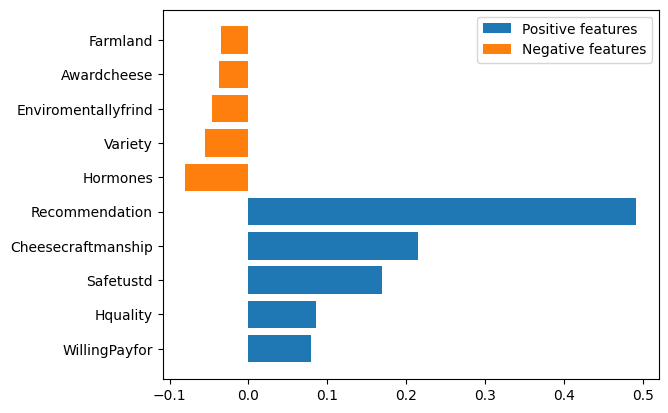

In [203]:
ranking = coefficients.sort_values(by=['Coefficient'])
top_5_positive = ranking[-5:]
top_5_negative = ranking[:5]

#top_5_positive = ranking['Feature'][-5:])
#top_5_negative= ranking['Feature'][:5])

plt.barh(top_5_positive['Feature'], top_5_positive['Coefficient'], label="Positive features")
plt.barh(top_5_negative['Feature'], top_5_negative['Coefficient'], label="Negative features")
plt.legend()


**Feature selection for model tuning**

In [247]:
col_pos = top_5_positive['Feature'].tolist()
col_neg = top_5_negative['Feature'].tolist()
new_features_list = col_pos + col_neg
new_features_list

['WillingPayfor',
 'Hquality',
 'Safetustd',
 'Cheesecraftmanship',
 'Recommendation',
 'Hormones',
 'Variety',
 'Enviromentallyfrind',
 'Awardcheese',
 'Farmland']

In [248]:
scaler = StandardScaler()
new_features = df[new_features_list]
new_features_scaled = scaler.fit_transform(new_features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(new_features_scaled, OAR, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Interpretation of coefficients
#coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': model.coef_})

# Print results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
#print('\nInterpretation of Coefficients:')
#print(coefficients)

Mean Squared Error: 1.3223238816157614
R-squared: 0.3863915379357902


**Model performance for different country subsets**

In [172]:
#Subset for countries: 'USA' 'Australia' 'New Zealand' 'France' 'Ireland'
df_1 = df[df['Country'] == 'USA']
df_2 = df[df['Country'] == 'Australia']
df_3 = df[df['Country'] == 'New Zealand']
df_4 = df[df['Country'] == 'France']
df_5 = df[df['Country'] == 'Ireland']

In [209]:
scaler = StandardScaler()
USA = df_1.iloc[:, 9:36]
USA = scaler.fit_transform(USA)

Australia = df_2.iloc[:, 9:36]
Australia = scaler.fit_transform(Australia)

NewZealand = df_3.iloc[:, 9:36]
NewZealand = scaler.fit_transform(NewZealand)

France = df_4.iloc[:, 9:36]
France = scaler.fit_transform(France)

Ireland = df_5.iloc[:, 9:36]
Ireland = scaler.fit_transform(Ireland)

In [210]:
def LinearCountry (x, y):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': model.coef_})

  #print(f'Mean Squared Error: {mse}')
  #print(f'R-squared: {r2}')
  #print('\nInterpretation of Coefficients:')
  #print(coefficients)
  return r2

<BarContainer object of 5 artists>

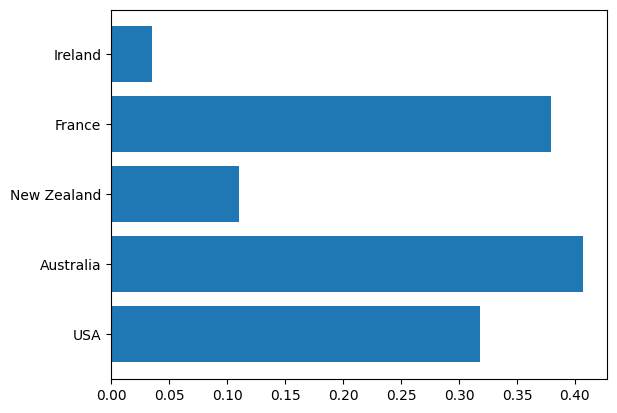

In [214]:
r2_1 = LinearCountry(USA, df_1['OAR'])
r2_2 = LinearCountry(Australia, df_2['OAR'])
r2_3 = LinearCountry(NewZealand, df_3['OAR'])
r2_4 = LinearCountry(France, df_4['OAR'])
r2_5 = LinearCountry(Ireland, df_5['OAR'])

r2_list = [r2_1, r2_2, r2_3, r2_4, r2_5]
countries = ['USA', 'Australia', 'New Zealand', 'France', 'Ireland']
plt.barh(countries, r2_list, label="Negative features")

##Mediation analysis on "Awareness"

**Simple mediation model for assessing the relationship between the mediator and the outcome**

In [215]:
mediators = df[['Awarenes', 'Familiarity']]

In [65]:
import statsmodels.api as sm
#treatment = features
iv = features
mediator = mediators
outcome = OAR

# Create a design matrix
X = sm.add_constant(mediator)

# Fit the mediation model
mediation_model = sm.OLS(outcome, X).fit()

# Display the results
print(mediation_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    OAR   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     694.8
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          6.06e-138
Time:                        22:46:04   Log-Likelihood:                -5302.3
No. Observations:                3012   AIC:                         1.061e+04
Df Residuals:                    3010   BIC:                         1.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Awarenes        5.2566      0.116     45.496      

**Mediation analysis from scratch**
1. Total effect of independent variables on dependent variable

In [218]:
iv = features
mediator = mediators
dv = OAR

# Total effect
X = sm.add_constant(iv)

total_effect_model = sm.OLS(dv, X).fit()
print(total_effect_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    OAR   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     63.61
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          2.66e-270
Time:                        01:37:17   Log-Likelihood:                -4930.4
No. Observations:                3012   AIC:                             9917.
Df Residuals:                    2984   BIC:                         1.009e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.2630    

2. Effect of independent variables on mediator

In [220]:
mediator_model = sm.OLS(mediator['Awarenes'], X).fit()
print(mediator_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Awarenes   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -110.5
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               1.00
Time:                        01:40:40   Log-Likelihood:                 99260.
No. Observations:                3012   AIC:                        -1.985e+05
Df Residuals:                    2984   BIC:                        -1.983e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.0000   1

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


3. Effect of independent variables on mediator on OAR

In [221]:
#DV model including mediator
iv_mediator = pd.concat([mediators['Awarenes'], features], axis=1)
X_dv = sm.add_constant(iv_mediator)

dv_model = sm.OLS(dv, X_dv).fit()
print(dv_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    OAR   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     63.61
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          2.66e-270
Time:                        01:41:49   Log-Likelihood:                -4930.4
No. Observations:                3012   AIC:                             9917.
Df Residuals:                    2984   BIC:                         1.009e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Awarenes                2.2630    

4. Proportion mediated

In [222]:
# Direct effect (c')
direct_effect = dv_model.params[1:]

# Indirect effect (a * b)
indirect_effect = mediator_model.params * dv_model.params['Awarenes']

# Total effect (c)
total_effect = total_effect_model.params

# Proportion mediated
proportion_mediated = indirect_effect / total_effect

#print("Direct Effect:", direct_effect)
#print("Indirect Effect:", indirect_effect)
#print("Total Effect:", total_effect)
print("Proportion Mediated:", proportion_mediated)


Proportion Mediated: const                  1.000000e+00
Recommendation        -5.697115e-16
Popular               -1.135522e-14
Tasty                  1.107193e-14
Available             -2.680966e-14
Leadertecnology       -1.023407e-13
Safetustd              1.158150e-15
Hquality              -1.115596e-15
Premium               -3.878928e-15
Nutritional            3.443215e-15
Value for Money        5.860179e-14
Farmland              -5.655019e-15
Enviromentallyfrind   -7.468493e-15
Optimize              -5.781701e-15
Hormones               1.578558e-14
Chemicals             -1.530319e-14
Familycompany          1.874345e-14
Leader                -1.875229e-15
Dedicated farms        2.226396e-15
Grasscowsa            -1.198931e-14
Variety               -4.773689e-16
Cheesecraftmanship    -9.251990e-16
Awardcheese            9.766411e-15
HQCHEESE              -1.001412e-13
HQINGRIDIENTS          1.267042e-14
Dairyhealth            1.940070e-14
foodipurchase          6.935011e-14
Willing